In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime

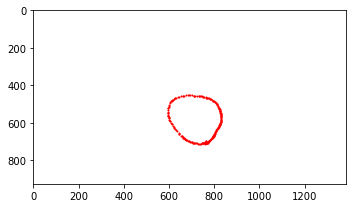

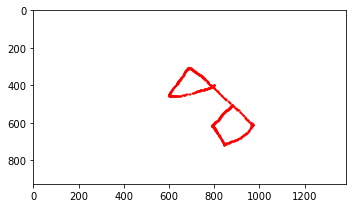

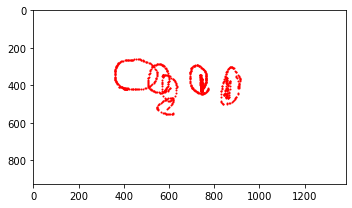

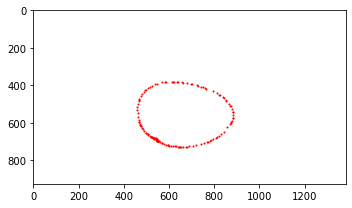

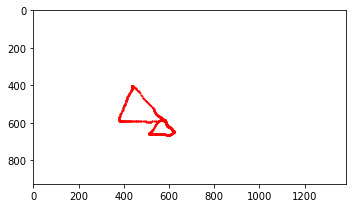

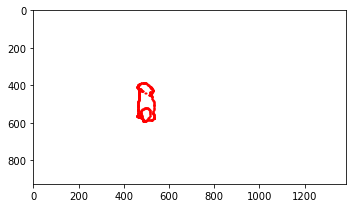

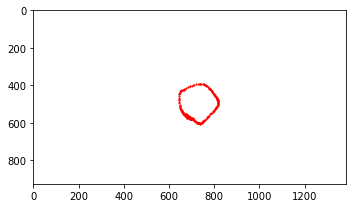

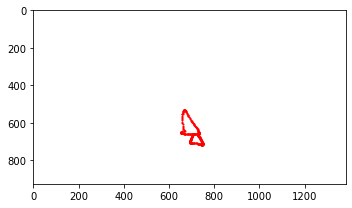

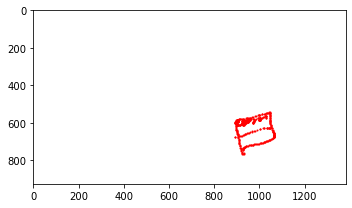


KeyboardInterrupt



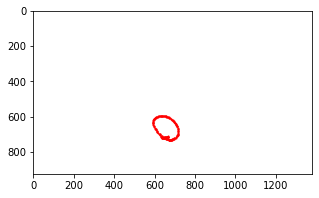

In [94]:
import psutil
train_folder = [7554,7556,7557,7558]#,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
for j in train_folder:
    for i in range(3,20,8):
        url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
        data = pd.read_csv(url)
        #print(data.info())
        data.columns = data.columns.str.replace(' ', '')
        submit_time = data.iloc[-1][0]
        start_time = data.iloc[-2][0]
        data.dropna(inplace=True)
        data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
        data['X'] = data.X.astype(float)

        x = data.X.tolist()
        y = data.Y.tolist()

        fig=plt.figure(figsize=(5,3))
        ax=fig.add_subplot(111)

        plt.gca().invert_yaxis()
        ax.scatter(x,y,s=1,c='red')
        ax.set_xbound(lower=0.0, upper=1381)
        ax.set_ybound(lower=0.0, upper=925)

        plt.tight_layout()
        plt.show()

In [119]:
data = pd.read_csv(r'train/7554/SimpleTest/7.csv')

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          48 non-null     object 
 1    Y         46 non-null     float64
 2    Pressure  46 non-null     float64
 3    TiltX     46 non-null     float64
 4    TiltY     46 non-null     float64
 5    Time      46 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [121]:
print(data.columns)
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,571.329714747661,364.894792,0.190661,-3352.0,2845.0,00:02.2408653
1,571.90899641991,364.578820,0.202380,-3352.0,2845.0,00:02.2564937
2,572.909573853794,363.894214,0.237781,-3352.0,2845.0,00:02.2721532


In [122]:
data.columns = data.columns.str.replace(' ', '')

In [123]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

In [124]:
print(submit_time)
print(start_time)

Time Elapsed till drawing submit: 00:12.8106947
Time Elapsed till drawing started: 00:02.2398633


In [125]:
#data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
data['X'] = data.X.astype(float)
data['Time'] = data.Time.astype(str)
data = data.set_index(data['Time']).drop("Time", axis = 1)

In [126]:
#data = data.set_index(pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time).drop("Time", axis = 1)

In [127]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY
Time,,,,,
00:02.2408653,571.329715,364.894792,0.190661,-3352.0,2845.0
00:02.2564937,571.908996,364.578820,0.202380,-3352.0,2845.0
00:02.2721532,572.909574,363.894214,0.237781,-3352.0,2845.0


<IPython.core.display.Javascript object>


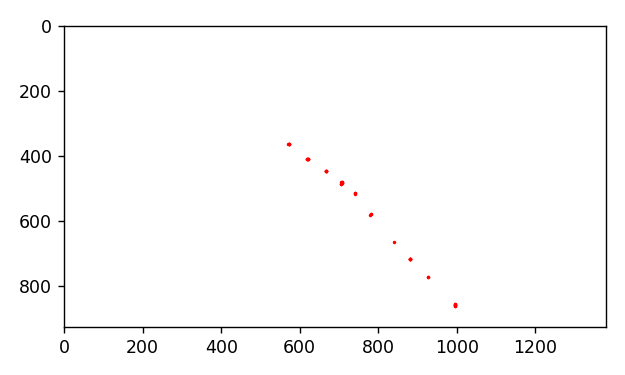

In [128]:
x = data.X.tolist()
y = data.Y.tolist()

fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

plt.gca().invert_yaxis()
ax.scatter(x,y,s=1,c='red')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


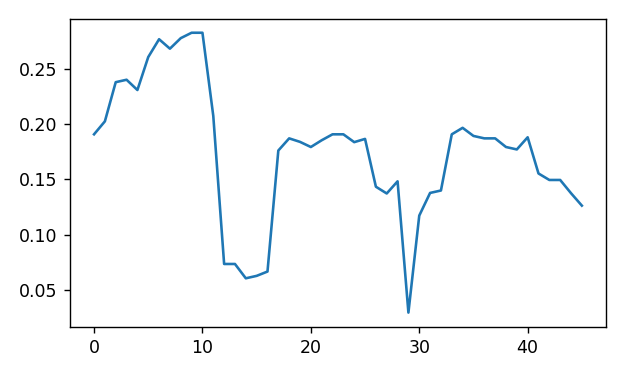

In [129]:
p = data.Pressure.tolist()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

ax.plot(p)

plt.tight_layout()
plt.show()

In [97]:
min(p)

0.0305027849972248

In [98]:
data.Pressure.sort_values()

Time
00:10.1252974    0.030503
00:10.1076407    0.030503
00:03.4174525    0.045884
00:03.4330757    0.045884
00:03.4488039    0.060044
                   ...   
00:03.9839859    0.731685
00:03.9996006    0.733639
00:03.9996006    0.733639
00:04.0152215    0.733639
00:04.0308489    0.733639
Name: Pressure, Length: 649, dtype: float64

In [78]:
diff_list_y = np.diff(y)
diff_list_y.min()
data.Pressure.mean()
data.Y.diff().mean()
data.index

Index(['00:03.4787405', '00:03.4943781', '00:03.5099814', '00:03.5256250',
       '00:03.5412356', '00:03.5569675', '00:03.5724849', '00:03.5724849',
       '00:03.5881057', '00:03.6037294',
       ...
       '00:36.6259491', '00:36.6259491', '00:36.6415725', '00:36.6572221',
       '00:36.6728354', '00:36.6884413', '00:36.6884413', '00:36.7040728',
       '00:36.7197060', '00:36.7197060'],
      dtype='object', name='Time', length=1229)

In [76]:
import math

def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

distance = list()
for i in range(len(x)-1):
    distance.append(calculateDistance(x[i], y[i], x[i+1], y[i+1]))

In [77]:
np.std(distance)

17.208968744991605

In [78]:
np.sort(distance,)

array([  0.        ,   0.        ,   0.        , ..., 303.7718874 ,
       321.67748825, 338.18889941])

In [79]:
print('max distance:',max(distance),'\nmin distance:',min(distance))

# Adjusting the best distance 
bestDistance=5.52

numberOfLines=[]
count=0
for d in distance:
    if d>bestDistance:
        numberOfLines.append(d)
        count=count+1

print('Number of lines:',count)

max distance: 338.18889940750466 
min distance: 0.0
Number of lines: 127


In [130]:
hand_raising = 0
for i in range(len(x)-1):
    if ((x[i+1] - x[i] > 15) or( y[i+1] - y[i] > 15)):
        hand_raising +=1
        #print(i,i+1)
        #print(p[i], p[i+1])
        #print('x[i],y[i] :',x[i],',',y[i])
        #print('x[i+1], y[i+1] : ',x[i+1],',',y[i+1])
    
print("There are " + str(hand_raising) + " hand raising in the drawing")  

There are 8 hand raising in the drawing


In [131]:
hand_raising = 0
for i in range(len(p)-1):
    if (p[i-2] > 0.4+ p[i]):
        hand_raising +=1
            #print(i,i+1)
            #print(p[i], p[i+1])
            #print('x[i],y[i] :',x[i],',',y[i])
            #print('x[i+1], y[i+1] : ',x[i+1],',',y[i+1])
    
print("There are " + str(hand_raising) + " hand raising in the drawing")  

There are 0 hand raising in the drawing


<IPython.core.display.Javascript object>


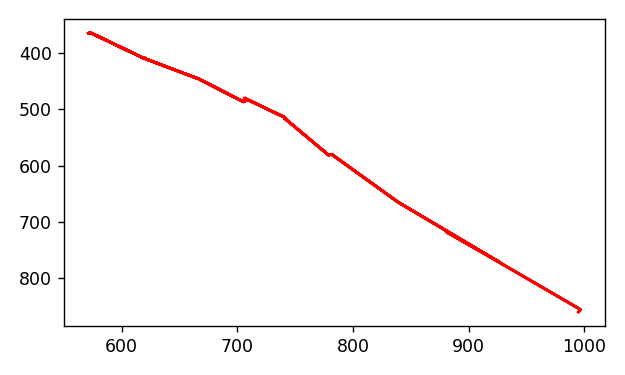

In [132]:
import psutil
%matplotlib notebook

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [133]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(x[i])
    d.append(y[i])
    if (p[i] - data.Pressure.max() > p[i-1]):
        print(p[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


In [164]:
data.Pressure.min()

0.0295262075960636